# Scraper Promiedos : Tabla Historica

Este scraper obtiene los datos de tabla historicos de la pagina web www.promiedos.com.ar , y crea un DataFrame limpio para su analisis 



### Carga de las Librerias
* requests : para hacer las peticiones a la web
* BeautifulSoup : para escrapear la web
* Pandas : para mostrar los datos en un dataframe y poder analizarlo.


In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Asignamos a la variable URL ,la pagina web que queremos escrapear 

In [43]:
url='https://www.promiedos.com.ar/tablahistorica'

Obtenemos los datos de la pagina y los parseamos.

In [82]:
page_response= requests.get(url, timeout=5)
page_content=BeautifulSoup(page_response.content ,"html.parser")

Buscamos dentro del contenido de la pagina los datos de los equipos. Estan identificados por el elemento "tr". Una vez obtenidos ,omitimos el primer elemento ya que corresponde a los titulos.

In [83]:
datos_web=page_content.find_all("tr")
datos_web=datos_web[1:]

Creamos un diccionario para guardar las estadisticas por equipo

In [91]:
estadisticas={}

* Hacemos una doble iteracion ,primero para recorrer todos los datos de la web ,y luego para recorrer todos los datos para cada equipo en particular.

* Cada stats que obtenemos del equipo la vamos guardando en una lista, incluido el nombre del mismo.El primer elemento de la lista debemos omitirlo ya que corresponde a un numero de equipo que no es de utilidad.

* Guardamos los datos de la lista "equipo" en el diccionario "estadisticas".

In [85]:
for datos_equipos in datos_web:
    equipo=[]    
    for dato in datos_equipos:            
        stats=dato.text        
        equipo.append(stats)                     
    equipo.pop(0)
    estadisticas[str(equipo[0])]=equipo[1:]

* Creamos un dataframe llamado "stats_equipos" con el diccionario "estadisticas" (debemos transponerlo ya que necesitamos intercambiar las filas por columnas)

* Asignamos los nombres a cada columna del dataframe

* Iteramos en las columnas que quisieramos convertir a numeros enteros (esto se debe a que cuando scrapeamos al principio ,los datos obtenidos de la web son todos strings)

In [88]:

stats_equipos = pd.DataFrame(estadisticas).transpose().reset_index()
stats_equipos.columns=['equipo','PtsHis',	'Ptsx3V',	'PJ'	,'PGT'	,'PG2'	,'PG3'	,'PE',	'PP',	'%PG1',	'%PE1'	,'%PP1']
for columna in stats_equipos.columns[1:-3]:    
    stats_equipos[str(columna)] = stats_equipos[str(columna)].astype(int)


### Dataframe final

In [90]:
stats_equipos

,equipo,PtsHis,Ptsx3V,PJ,PGT,PG2,PG3,PE,PP,%PG1,%PE1,%PP1
0,River Plate,5425,7000,3804,2016,1575,441,952,836,53%,25%,22%
1,Boca Juniors,5242,6670,3689,1912,1428,484,934,843,52%,25%,23%
2,San Lorenzo,4798,6082,3677,1698,1284,414,988,991,46%,27%,27%
3,Independiente,4765,6127,3735,1702,1362,340,1021,1012,46%,27%,27%
4,Racing Club,4609,5875,3662,1624,1266,358,1003,1035,44%,27%,28%
...,...,...,...,...,...,...,...,...,...,...,...,...
164,Atl. Uruguay,1,1,6,0,0,0,1,5,0%,17%,83%
165,Alte Brown,0,0,3,0,0,0,0,3,0%,0%,100%
166,Alianza (CC),0,0,2,0,0,0,0,2,0%,0%,100%
167,Guemes (SdE),0,0,2,0,0,0,0,2,0%,0%,100%


## Graficamos los puntos historicos obtenidos


Cargamos la libreria de graficos y definimos el tamaño de los gráficos para que se ajusten bien al notebook

In [105]:
%matplotlib inline   
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 18, 8
plt.style.use('ggplot')

Seteamos la columna "equipo" como indice.

In [92]:
stats_equipos.set_index("equipo",inplace=True)

Mostramos los 10 equipos que mas puntos obtuvieron en primera division Argentina

<AxesSubplot:xlabel='equipo'>

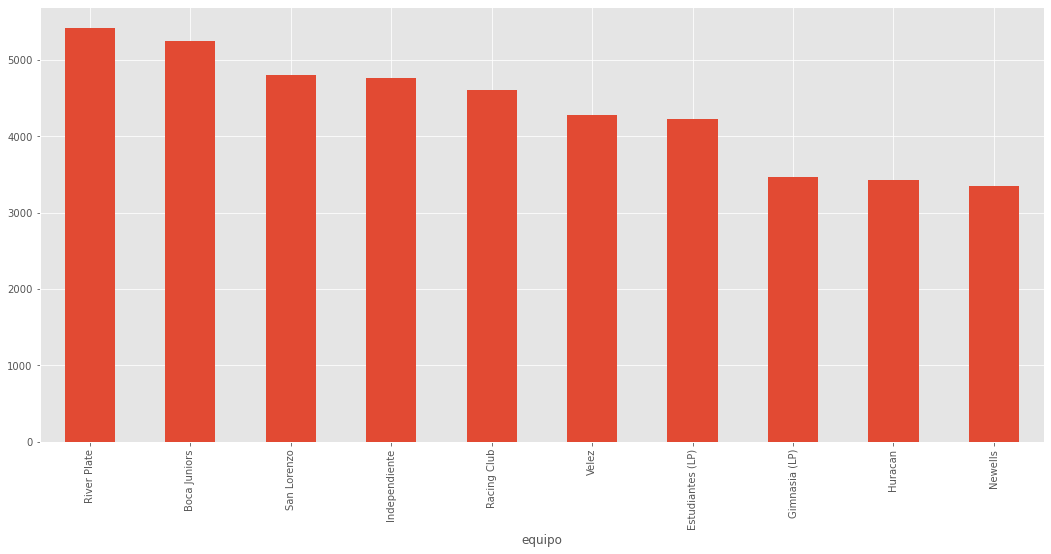

In [107]:
stats_equipos.PtsHis.iloc[:10].plot(kind='bar')